Peak 1:
  Höhe (a): 451.0887657221505 ± 1.9340514310573602
  Mean (mu): 330.02604685372023 ± 0.16646470583858713
  Standard deviation (sigma): 34.145224334962315 ± 0.17421575824767915

Peak 2:
  Höhe (a): 259.0023689510709 ± 1.4172389561922571
  Mean (mu): 909.3284585783734 ± 0.39428342287252294
  Standard deviation (sigma): 63.07959837392674 ± 0.4077067612977394

Peak 3:
  Höhe (a): 21.047494297934065 ± 1.1309610795735001
  Mean (mu): 3304.441553962687 ± 6.118968472436357
  Standard deviation (sigma): 100.16634058087277 ± 6.3451520830626045

Peak 4:
  Höhe (a): 77.28237646797056 ± 0.9651381835770468
  Mean (mu): 3916.407463537628 ± 1.960966986856479
  Standard deviation (sigma): 138.60673290474173 ± 2.0486072346914397

Background parameters:
  b0: 38.4797268165063 ± 0.6470892806866386
  b1: 0.017762316718014037 ± 0.000651351168037652
  b2: -8.405025767142272e-06 ± 1.753635239822859e-07
  b3: 7.144059849942436e-10 ± 1.3643857200730145e-11



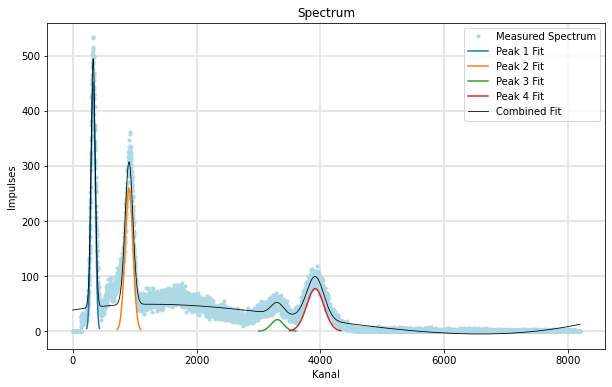

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import find_peaks

def multi_gauss(x, *params):
    n_peaks = (len(params) - 4) // 3
    background = params[-4] + params[-3] * x + params[-2] * x**2 + params[-1] * x**3  
    y = np.zeros_like(x) + background
    for i in range(n_peaks):
        a = params[3*i]
        mu = params[3*i + 1]
        sigma = params[3*i + 2]
        y += a * np.exp(-(x - mu)**2 / (2 * sigma**2))
    return y

def gaussian(x, a, mu, sigma):
    return a * np.exp(-(x - mu)**2 / (2 * sigma**2))

# Load data from text file
data = np.loadtxt('521/spectrum.txt')
x_data = data[:, 0]
y_data = data[:, 1]

# Manually specify the initial guesses for each peak
# Format: [height1, mean1, width1, height2, mean2, width2, ..., b0, b1, b2, b3]
initial_guesses = [
    500, 300, 50,  # Peak 1: height, mean, width
    400, 900, 50,  # Peak 2: height, mean, width
    50, 3282, 50,  # Peak 3: height, mean, width
    100, 4000, 50,  # Peak 4: height, mean, width
    np.min(y_data), 0, 0, 0  # Background polynomial coefficients
]

# Perform curve fitting with increased maxfev
params, pcov = curve_fit(multi_gauss, x_data, y_data, p0=initial_guesses, maxfev=10000)

# Extract fit parameters
fit_params = params[:3*4]
background_params = params[3*4:]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_data, y_data, label='Measured Spectrum', color='lightblue', marker='.', linestyle='None')

# Plot individual fits
for i in range(4):
    a, mu, sigma = fit_params[3*i], fit_params[3*i + 1], fit_params[3*i + 2]
    x_fit = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 1000)
    plt.plot(x_fit, gaussian(x_fit, a, mu, sigma), label=f'Peak {i+1} Fit')

# Plot combined fit
plt.plot(x_data, multi_gauss(x_data, *params), label='Combined Fit', color='black', linewidth=0.8)

plt.title('Spectrum')
plt.xlabel('Kanal')
plt.ylabel('Impulses')
plt.grid(linestyle='-', color='0.9', linewidth=2)
plt.legend()

# Print fit parameters for each peak with uncertainties
for i in range(4):
    a_fit, mu_fit, sigma_fit = fit_params[3*i], fit_params[3*i + 1], fit_params[3*i + 2]
    delta_a_fit, delta_mu_fit, delta_sigma_fit = np.sqrt(np.diag(pcov))[3*i:3*i+3]
    print(f'Peak {i+1}:')
    print(f'  Höhe (a): {a_fit} ± {delta_a_fit}')
    print(f'  Mean (mu): {mu_fit} ± {delta_mu_fit}')
    print(f'  Standard deviation (sigma): {sigma_fit} ± {delta_sigma_fit}')
    print()

# Print background parameters with uncertainties
b_fit, b1_fit, b2_fit, b3_fit = background_params
delta_b_fit, delta_b1_fit, delta_b2_fit, delta_b3_fit = np.sqrt(np.diag(pcov)[-4:])
print(f'Background parameters:')
print(f'  b0: {b_fit} ± {delta_b_fit}')
print(f'  b1: {b1_fit} ± {delta_b1_fit}')
print(f'  b2: {b2_fit} ± {delta_b2_fit}')
print(f'  b3: {b3_fit} ± {delta_b3_fit}')
print()

plt.show()
